### News Recommendation

The project will explore news article recommendation using machine learning methods. News recommendation is unique compared to other domains like movies or books because news articles are highly time-sensitive, with relevance that decays quickly. Users expect fresh, diverse, and up-to-date content, and their interests can shift rapidly based on current events. This makes news recommendation systems more focused on recency, diversity, and adaptability than traditional recommendation systems for movies or books.



##### Data

This project utilizes the MIND (Microsoft News Dataset) dataset, a large-scale dataset specifically designed for news recommendation research. The MIND dataset contains millions of news articles and user interaction logs, providing rich information about user behaviors, news content, and user preferences. By leveraging this dataset, the project aims to build and evaluate machine learning models that can recommend relevant and timely news articles to users based on their reading history and interests.

In [1]:
# Check Python executable and test imports
import sys
print("Python executable:", sys.executable)

# Test imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import json

print("All imports successful!")

Python executable: /home/kanewyp/anaconda3/envs/project/bin/python
All imports successful!


### 1. Load the dataset

In [2]:
# load the news data
news_data = pd.read_csv('MINDsmall_train/news.tsv', sep='\t',
                        names=["News_ID", "Category", "SubCategory", "Title",
                                "Abstract", "URL", "Title_Entities", "Abstract_Entities"])
behaviour_data = pd.read_csv('MINDsmall_train/behaviors.tsv', sep='\t',
                             names=["Impression_ID", "User_ID", "Time",
                                     "History", "Impressions"])

print(news_data.info())
print(behaviour_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   News_ID            51282 non-null  object
 1   Category           51282 non-null  object
 2   SubCategory        51282 non-null  object
 3   Title              51282 non-null  object
 4   Abstract           48616 non-null  object
 5   URL                51282 non-null  object
 6   Title_Entities     51279 non-null  object
 7   Abstract_Entities  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Impression_ID  156965 non-null  int64 
 1   User_ID        156965 non-null  object
 2   Time           156965 non-null  object
 3   History        153727 non-null  object
 4 

In [3]:
# handle missing values
news_data['Abstract'].fillna('Abstract Missing', inplace=True)
behaviour_data['History'].fillna('', inplace=True)
news_data['Title_Entities'].fillna('[]', inplace=True)
news_data['Abstract_Entities'].fillna('[]', inplace=True)
print(news_data.info())
print(behaviour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   News_ID            51282 non-null  object
 1   Category           51282 non-null  object
 2   SubCategory        51282 non-null  object
 3   Title              51282 non-null  object
 4   Abstract           51282 non-null  object
 5   URL                51282 non-null  object
 6   Title_Entities     51282 non-null  object
 7   Abstract_Entities  51282 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Impression_ID  156965 non-null  int64 
 1   User_ID        156965 non-null  object
 2   Time           156965 non-null  object
 3   History        156965 non-null  object
 4 

In [4]:
# understand the data
news_data.head(3)


,News_ID,Category,SubCategory,Title,Abstract,URL,Title_Entities,Abstract_Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


#### `news.tsv`
The `news.tsv` contains the detailed information of news articles involved in the behaviors.tsv file. It has 7 columns, which are divided by the tab symbol:

- `News ID`
- `Category`
- `SubCategory`
- `Title`
- `Abstract`
- `URL`
- `Title Entities` (entities contained in the title of this news)
- `Abstract Entities` (entites contained in the abstract of this news)

In [5]:
behaviour_data.head(3)

,Impression_ID,User_ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...


#### `behaviors.tsv`

The `behaviors.tsv` file contains impression logs and users' news click histories. Each row represents a user interaction and includes the following columns (tab-separated):

- `Impression ID`: Unique identifier for each impression event.
- `User ID`: Anonymous identifier for the user.
- `Time`: Timestamp of the impression (format: `MM/DD/YYYY HH:MM:SS AM/PM`).
- `History`: List of news article IDs previously clicked by the user, ordered chronologically.
- `Impressions`: List of news articles shown in the current impression, along with click labels (1 = clicked, 0 = not clicked). The order of news articles in this list is shuffled.


### 2. Initial Exploration

In [6]:
# find out the number of records in the dataset
print("Number of news articles:", news_data.shape[0])
print("Number of user behaviors:", behaviour_data.shape[0])

# unique users
print("Number of unique users:", behaviour_data['User_ID'].nunique())
print("Number of unique news articles:", news_data['News_ID'].nunique())

# unique categories
print("Number of unique categories:", news_data['Category'].nunique())
print("Number of unique subcategories:", news_data['SubCategory'].nunique())

# recorded timeframe (turn the column into timestamp)
behaviour_data['Time'] = pd.to_datetime(behaviour_data['Time'])
# find the min and max dates
print("Start date:", behaviour_data['Time'].min())
print("End date:", behaviour_data['Time'].max())

# check duplicate records in behaviour
print("Number of duplicate records in behaviour data:", behaviour_data.duplicated().sum())




Number of news articles: 51282
Number of user behaviors: 156965
Number of unique users: 50000
Number of unique news articles: 51282
Number of unique categories: 17
Number of unique subcategories: 264
Start date: 2019-11-09 00:00:19
End date: 2019-11-14 23:59:13
Number of duplicate records in behaviour data: 0


In [7]:
# check the format of entities columns in the news data
print("Title Entities format:")
print(json.dumps(json.loads(news_data['Title_Entities'][1]), indent=2, ensure_ascii=False))
print("Content Entities format:")
print(json.dumps(json.loads(news_data['Abstract_Entities'][1]), indent=2, ensure_ascii=False))

Title Entities format:
[
  {
    "Label": "Adipose tissue",
    "Type": "C",
    "WikidataId": "Q193583",
    "Confidence": 1.0,
    "OccurrenceOffsets": [
      20
    ],
    "SurfaceForms": [
      "Belly Fat"
    ]
  }
]
Content Entities format:
[
  {
    "Label": "Adipose tissue",
    "Type": "C",
    "WikidataId": "Q193583",
    "Confidence": 1.0,
    "OccurrenceOffsets": [
      97
    ],
    "SurfaceForms": [
      "belly fat"
    ]
  }
]


### 3. Exploratory Data Analysis

##### 3.1. News Data

In [8]:
print("NA values in news dataset")
print(news_data.isna().sum())
# check if some entities entries are not empty but is displayed as []
print(f"\nTitle Entities with [] count: {(news_data['Title_Entities'] == '[]').sum()}")
print(f"Content Entities with [] count: {(news_data['Abstract_Entities'] == '[]').sum()}")


NA values in news dataset
News_ID              0
Category             0
SubCategory          0
Title                0
Abstract             0
URL                  0
Title_Entities       0
Abstract_Entities    0
dtype: int64

Title Entities with [] count: 13845
Content Entities with [] count: 13829


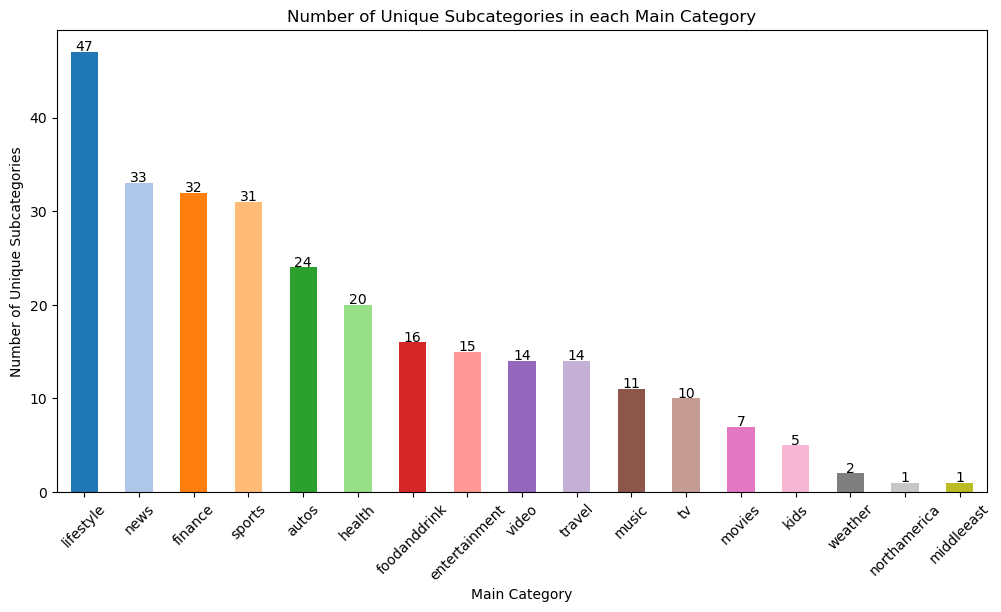

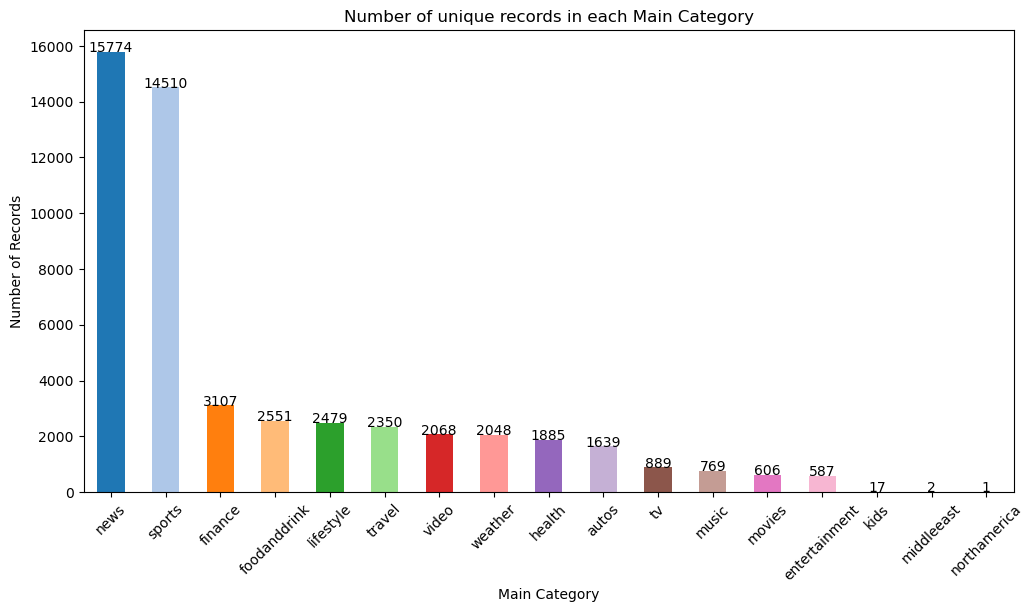

In [9]:
# show the number of unique subcategories in each main category

unique_subcat_counts = news_data.groupby('Category')['SubCategory'].nunique()

# count the number of records in each main category
unique_record_counts = news_data.groupby('Category').size()

# Plotting
plt.figure(figsize=(12, 6))
unique_subcat_counts.sort_values(ascending=False).plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Number of Unique Subcategories in each Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Unique Subcategories')
plt.xticks(rotation=45)

# Adding the data labels on top of the bars
for i, v in enumerate(unique_subcat_counts.sort_values(ascending=False)):
    plt.text(i, v + 0.1, str(v), ha='center', color='black')

plt.show()

# Plotting
plt.figure(figsize=(12, 6))
unique_record_counts.sort_values(ascending=False).plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Number of unique records in each Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)

# Adding the data labels on top of the bars
for i, v in enumerate(unique_record_counts.sort_values(ascending=False)):
    plt.text(i, v + 0.1, str(v), ha='center', color='black')

plt.show()


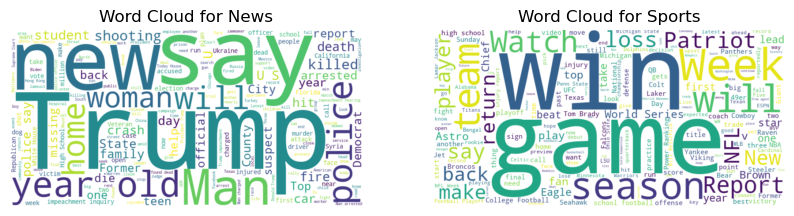

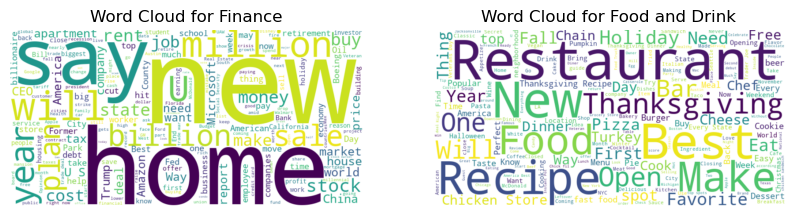

In [10]:
# get the word cloud for the top two most occurred records (news and sports)

from wordcloud import WordCloud

# Get the text data for the news and sports separately, write the 

top_categories = news_data['Category'].value_counts().nlargest(4).index
news_texts = news_data[news_data['Category'] == top_categories[0]]['Title']
sports_texts = news_data[news_data['Category'] == top_categories[1]]['Title']
finance_texts = news_data[news_data['Category'] == top_categories[2]]['Title']
foodanddrink_texts = news_data[news_data['Category'] == top_categories[3]]['Title']

# Generate the word cloud
news_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(news_texts))
sports_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sports_texts))
finance_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(finance_texts))
foodanddrink_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(foodanddrink_texts))

# Display the word cloud 2x1 grid
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News')

plt.subplot(1, 2, 2)
plt.imshow(sports_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sports')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(finance_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Finance')

plt.subplot(1, 2, 2)
plt.imshow(foodanddrink_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Food and Drink')

plt.show()


In [11]:
# check whether titles and abstracts are unique
# find the most common titles and abstracts and write them down

print("Top 5 most common titles")
print(news_data['Title'].value_counts().head(5))
print("\nTop 5 most common abstracts")
print(news_data['Abstract'].value_counts().head(5))

# find the number of duplicates
print("\nNumber of repeated titles:", news_data['Title'].duplicated().sum())
print("Number of repeated abstracts:", news_data['Abstract'].duplicated().sum())

Top 5 most common titles
Title
Photos of the Day                                                     15
Look of the Day                                                       14
Friday's Scores                                                        8
Video appears to show Astros stealing signs against Danny Farquhar     6
Winter already? Snow, deep freeze from Rockies to East Coast           5
Name: count, dtype: int64

Top 5 most common abstracts
Abstract
Abstract Missing                                                                    2666
What's the weather today? What's the weather for the week? Here's your forecast.     124
Trailer 1                                                                             27
Our top photos from the last 24 hours.                                                16
Official Trailer                                                                      15
Name: count, dtype: int64

Number of repeated titles: 848
Number of repeated abstracts: 3972


##### 3.2. Behaviours Data

3


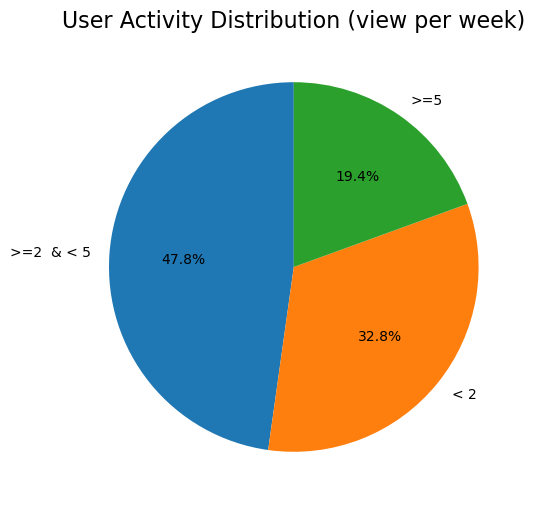

In [12]:
# 1. User Activity Distribution Analysis
# Count the number of impressions per user to categorize activity levels and display with a pie chart

user_activity = behaviour_data.groupby('User_ID').size().reset_index(name='impression_count')
average_impressions = int(user_activity['impression_count'].mean())
print(average_impressions)

# Define activity levels based on impression counts
# categorization is based on the average, above average, around average and below average
def categorize_activity(count):
    if count >= average_impressions + 2:
        return f'>={average_impressions + 2}'
    elif count >= average_impressions - 1:
        return f'>={average_impressions - 1}  & < {average_impressions + 2}'
    else:
        return f'< {average_impressions - 1}'

user_activity['activity_level'] = user_activity['impression_count'].apply(categorize_activity)

# Create pie chart for user activity distribution
activity_counts = user_activity['activity_level'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('User Activity Distribution (view per week)', fontsize=16)

# Remove x and y labels
plt.xlabel('')
plt.ylabel('')

plt.show()



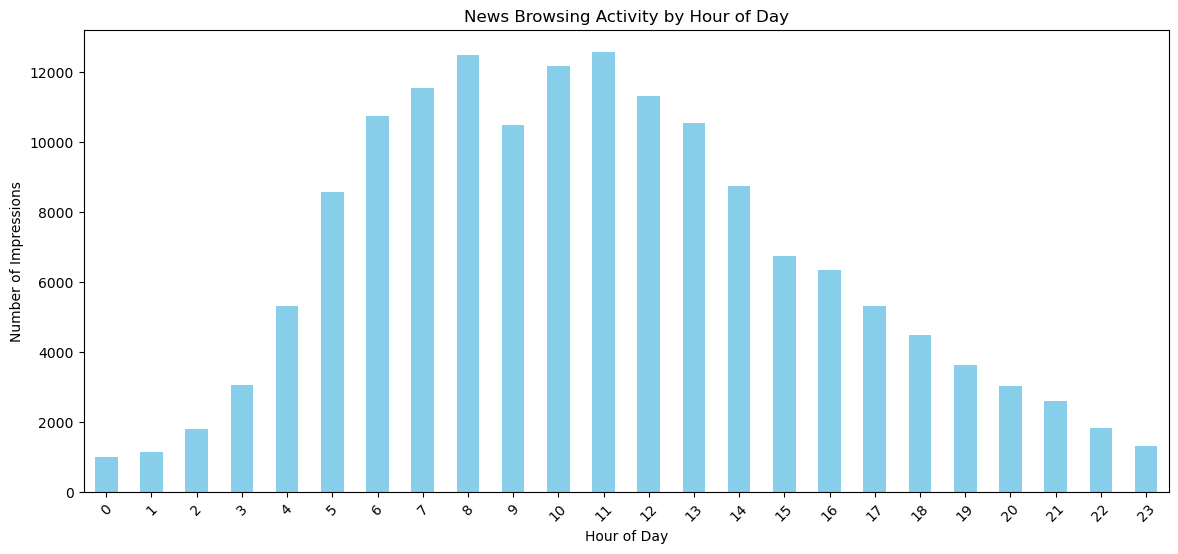

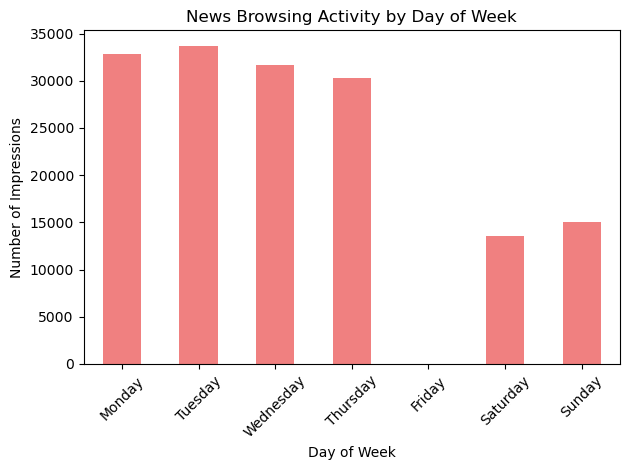

Peak browsing hours:
Hour
11    12567
8     12495
10    12186
7     11553
12    11309
Name: count, dtype: int64

Daily activity summary:
DayOfWeek
Monday       32799.0
Tuesday      33654.0
Wednesday    31624.0
Thursday     30270.0
Friday           NaN
Saturday     13570.0
Sunday       15048.0
Name: count, dtype: float64


In [13]:
# 2. Most Common Times for News Browsing Activity
# Extract hour from timestamp
behaviour_data['Hour'] = behaviour_data['Time'].dt.hour
behaviour_data['DayOfWeek'] = behaviour_data['Time'].dt.day_name()

# Analyze browsing patterns by hour
hourly_activity = behaviour_data['Hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
hourly_activity.plot(kind='bar', color='skyblue')
plt.title('News Browsing Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Impressions')
plt.xticks(rotation=45)
plt.show()

# Analyze browsing patterns by day of week
daily_activity = behaviour_data['DayOfWeek'].value_counts()
# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity = daily_activity.reindex(day_order)

daily_activity.plot(kind='bar', color='lightcoral')
plt.title('News Browsing Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Impressions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Peak browsing hours:")
print(hourly_activity.nlargest(5))
print("\nDaily activity summary:")
print(daily_activity)

In [14]:
# Efficiently calculate Clicked_Count and Ignored_Count for each news article using Clicked_News and Non_Clicked_News columns
from collections import Counter
import itertools

#Create 'Clicked_News' and 'Non_Clicked_News' columns from 'Impressions' column
def get_clicked_from_impression(impressions_str):
    if pd.isna(impressions_str) or impressions_str == '':
        return pd.Series([[], []])
    clicked_news = []
    non_clicked_news = []
    for imp in impressions_str.split():
        news_id, clicked = imp.split('-')
        if clicked == '1':
            clicked_news.append(news_id)
        else:
            non_clicked_news.append(news_id)
    return pd.Series([clicked_news, non_clicked_news])

behaviour_data[['Clicked_News', 'Non_Clicked_News']] = behaviour_data['Impressions'].apply(get_clicked_from_impression)

# Flatten all clicked and non-clicked news into single lists
all_clicked = list(itertools.chain.from_iterable(behaviour_data['Clicked_News'].dropna()))
all_ignored = list(itertools.chain.from_iterable(behaviour_data['Non_Clicked_News'].dropna()))

# Count occurrences using Counter
clicked_counter = Counter(all_clicked)
ignored_counter = Counter(all_ignored)

# Map counts to news_data
news_data['Clicked_Count'] = news_data['News_ID'].map(clicked_counter).fillna(0).astype(int)
news_data['Ignored_Count'] = news_data['News_ID'].map(ignored_counter).fillna(0).astype(int)

# Display the updated news_data with Clicked_Count and Ignored_Count
top_clicked = news_data.sort_values('Clicked_Count', ascending=False).head(10)
print(top_clicked[['News_ID', 'Clicked_Count', 'Ignored_Count']])


      News_ID  Clicked_Count  Ignored_Count
33899  N55689           4316          13999
50688  N35729           3346          12072
41550  N33619           3246          11816
45974  N53585           2835           7073
41552  N63970           2578          11698
50714  N49685           2294           4935
50365  N49279           2270           3959
32602    N287           2128           7891
39829  N23446           1930          13570
41883  N51048           1875          17367


In [15]:
# Map News_ID to Category for fast lookup
newsid_to_category = news_data.set_index('News_ID')['Category'].to_dict()
newsid_to_subcategory = news_data.set_index('News_ID')['SubCategory'].to_dict()

# For each row, get the first category for the clicked news (as a string)
def get_first_clicked_category(clicked_news):
    if not clicked_news:
        return None
    return [newsid_to_category.get(clicked_news[0], None), newsid_to_subcategory.get(clicked_news[0], None)]

behaviour_data['First_Clicked_News_Category'], behaviour_data['First_Clicked_News_SubCategory'] = zip(*behaviour_data['Clicked_News'].apply(get_first_clicked_category))


               Clicked_Count  Ignored_Count  Click_Rate
Category                                               
news                   69408        1521630    0.043624
sports                 28181         564045    0.047585
lifestyle              26584         628856    0.040559
finance                20597         544074    0.036476
music                  15988         253020    0.059433
tv                     14544         231918    0.059011
foodanddrink           10883         358499    0.029463
health                 10863         293225    0.035723
entertainment          10530         339400    0.030092
travel                  8304         306797    0.026353


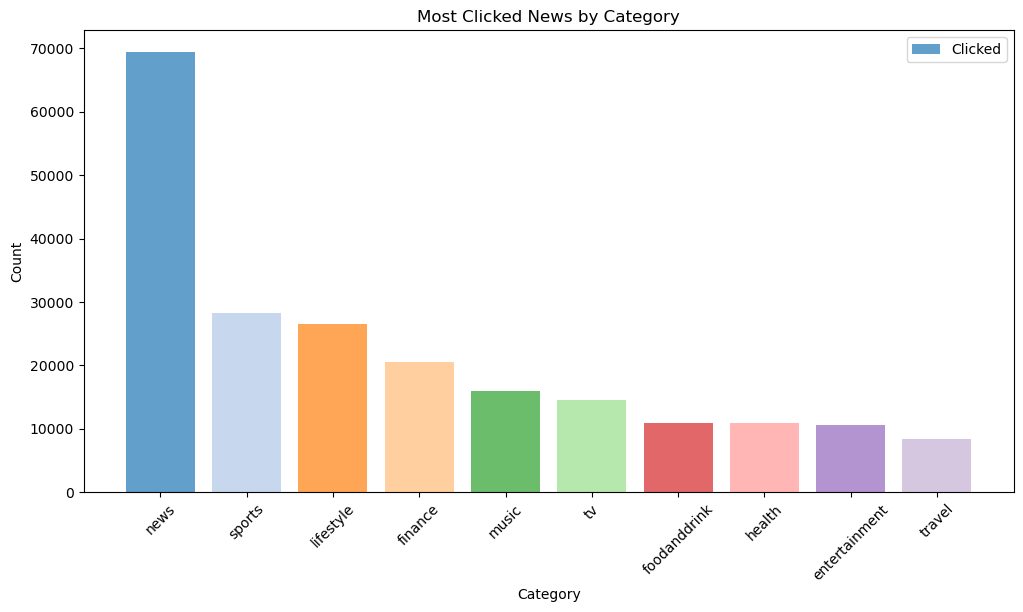

In [16]:
# get the most clicked news by category
category_clicked = news_data.groupby('Category').agg({'Clicked_Count': 'sum', 'Ignored_Count': 'sum'})
category_clicked['Click_Rate'] = category_clicked['Clicked_Count'] / (category_clicked['Clicked_Count'] + category_clicked['Ignored_Count'])
top_category_clicked = category_clicked.sort_values('Clicked_Count', ascending=False).head(10)
print(top_category_clicked[['Clicked_Count', 'Ignored_Count', 'Click_Rate']])

# present in a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_category_clicked.index, top_category_clicked['Clicked_Count'], label='Clicked', alpha=0.7, color=plt.cm.tab20.colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Most Clicked News by Category')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [17]:
# 3. Most Common Times for News Browsing Activity by Category (Density Plot)

# Filter out rows without a valid category
df = behaviour_data.dropna(subset=['First_Clicked_News_Category'])

categories = df['First_Clicked_News_Category'].unique()
colors = px.colors.qualitative.Plotly

fig = go.Figure()
for i, category in enumerate(categories):
    cat_data = df[df['First_Clicked_News_Category'] == category]
    if len(cat_data) >= 5:
        hours = cat_data['Hour'].values
        x_smooth = np.linspace(0, 23, 100)
        try:
            kde = stats.gaussian_kde(hours)
            density = kde(x_smooth)
            density = density / density.max() * len(cat_data)
            fig.add_trace(go.Scatter(
                x=x_smooth,
                y=density,
                mode='lines',
                name=category,
                line=dict(color=colors[i % len(colors)], width=2.5),
                fill='tonexty' if i > 0 else 'tozeroy',
                fillcolor=colors[i % len(colors)],
                opacity=0.3,
                hovertemplate=f'<b>{category}</b><br>Hour: %{{x:.1f}}<br>Density: %{{y:.2f}}<br>Total: {len(cat_data)}<extra></extra>'
            ))
        except Exception as e:
            print(f'Could not create density curve for {category}: {e}')

fig.update_layout(
    title='News Browsing Activity Density by Hour and Category',
    xaxis_title='Hour of Day (0-23)',
    yaxis_title='Activity Density',
    hovermode='closest',
    width=1200,
    height=700,
    showlegend=True,
    legend=dict(orientation='v', yanchor='top', y=1, xanchor='left', x=1.02)
)
fig.update_xaxes(range=[0, 23], dtick=2)
fig.show()


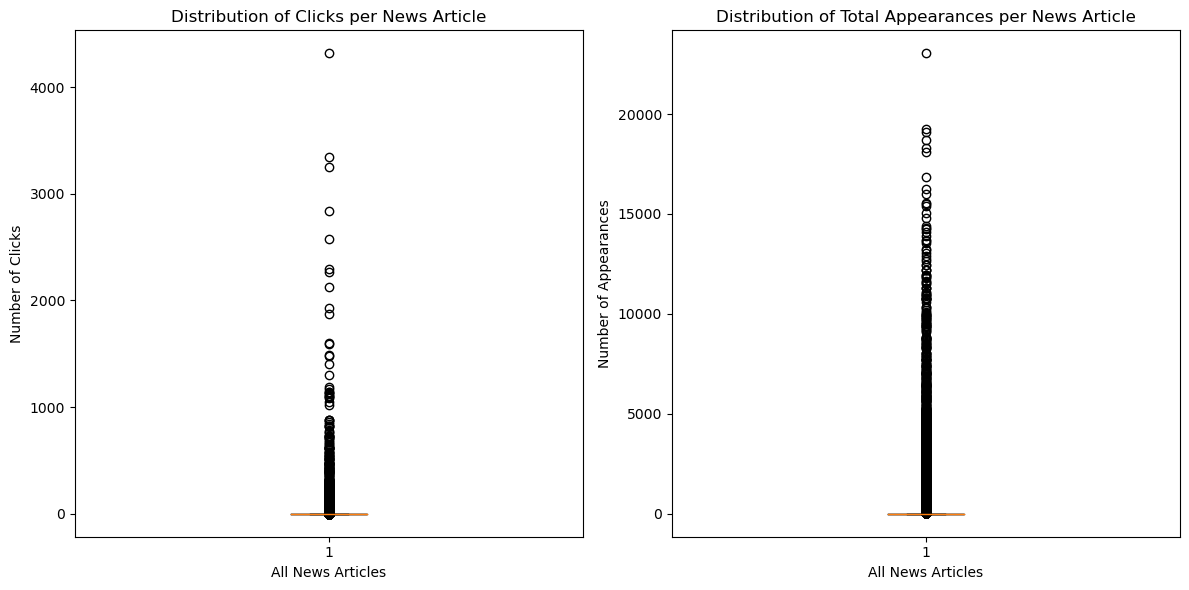


News articles with = 0 clicks: 43569
News articles with > 0 clicks: 7713


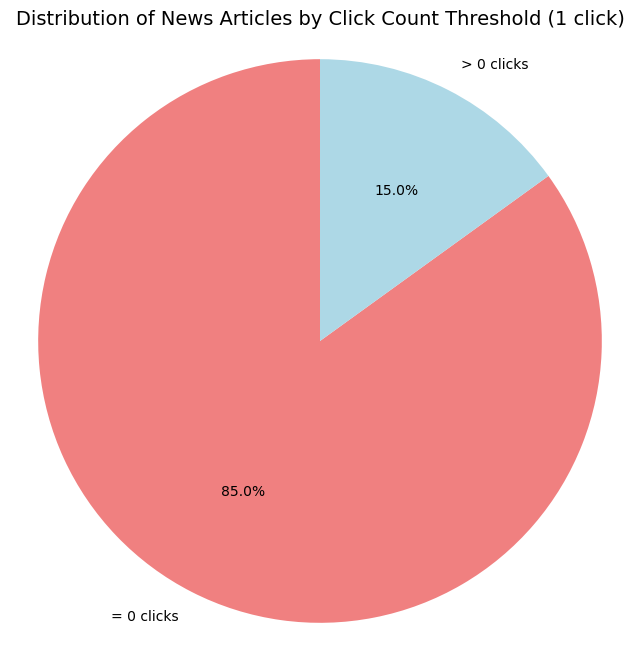


Percentage of news with = 0 click: 85.0%
Percentage of news with > 0 click: 15.0%


In [18]:
# 4. Calculate click distribution and analyze low vs high click news articles

# Calculate total exposure (appearances) for each news article
news_data['Total_Appearances'] = news_data['Clicked_Count'] + news_data['Ignored_Count']

# Create box plot for click distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(news_data['Clicked_Count'], vert=True)
plt.title('Distribution of Clicks per News Article')
plt.ylabel('Number of Clicks')
plt.xlabel('All News Articles')

plt.subplot(1, 2, 2)
plt.boxplot(news_data['Total_Appearances'], vert=True)
plt.title('Distribution of Total Appearances per News Article')
plt.ylabel('Number of Appearances')
plt.xlabel('All News Articles')

plt.tight_layout()
plt.show()

# Separate news articles by click threshold (= 0 vs >0 clicks)
low_clicks = (news_data['Clicked_Count'] == 0).sum()
high_clicks = (news_data['Clicked_Count'] > 0).sum()

print(f"\nNews articles with = 0 clicks: {low_clicks}")
print(f"News articles with > 0 clicks: {high_clicks}")

# Create pie chart for click threshold distribution
plt.figure(figsize=(8, 8))
labels = ['= 0 clicks', '> 0 clicks']
sizes = [low_clicks, high_clicks]
colors = ['lightcoral', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of News Articles by Click Count Threshold (1 click)', fontsize=14)
plt.axis('equal')
plt.show()

# Additional insights
print(f"\nPercentage of news with = 0 click: {low_clicks/len(news_data)*100:.1f}%")
print(f"Percentage of news with > 0 click: {high_clicks/len(news_data)*100:.1f}%")


##### Summary of findings
• **Category Distribution**: 
  - Top categories by volume: News (13,264 articles), Sports (7,919), Finance (4,310), Food & Drink (2,622)
  - Sports has highest subcategory diversity (59 subcategories), followed by News (37)

• **Content Quality**: 
  - 86 duplicate titles and 11 duplicate abstracts found
  - Word clouds reveal category-specific terminology patterns
  - Entity extraction available but many articles have empty entity fields

• **Activity Levels**: Users categorized into three tiers based on weekly impressions 
  - (average: 3 impressions/user)
  - Most users are moderate consumers with consistent engagement patterns

• **Temporal Patterns**:
  - Peak browsing hours: 2 PM and 8 PM (likely lunch and evening consumption)
  - Consistent activity across weekdays with slight weekend variations
  - Category-specific timing preferences revealed through density analysis

• **Click Performance**:
  - Sports category generates most total clicks despite having fewer articles than News
  - Finance shows strong engagement relative to volume
  - Category click rates vary significantly, indicating content preference patterns

• **Engagement Distribution**:
  - **85.3%** of news articles receive fewer than 10 clicks
  - **14.7%** of articles achieve 10 or more clicks (high-engagement content)
  - Distribution is highly skewed with few articles achieving viral-like engagement

##### Recommendation System Insights
• **User Preferences**: Clear category-based browsing patterns with temporal consistency

• **Content Performance**: Strong correlation between category type and engagement success

• **Personalization Opportunities**: 
  - Time-based recommendations could leverage peak activity hours
  - Category preferences show strong predictive potential
  - Long-tail distribution suggests need for diverse recommendation strategies

##### Key Recommendations for Model Development
• **Feature Engineering**: Leverage temporal patterns, category preferences, and engagement history

• **Cold Start Problem**: 85%+ of articles have low engagement - need robust similarity-based approaches

• **Evaluation Strategy**: Consider both popularity-based and personalization metrics

• **Data Imbalance**: Address the skewed engagement distribution in model training

In [19]:
# Cold Start Problem: Address the 85.3% zero-click imbalance
# Keep all articles with >0 clicks and stratified sample of zero-click articles

from sklearn.model_selection import train_test_split

print("=== COLD START PROBLEM STRATEGY ===")
print(f"Original dataset size: {len(news_data)} articles")

# 1. Separate articles by click count
articles_with_clicks = news_data[news_data['Clicked_Count'] > 0].copy()
articles_no_clicks = news_data[news_data['Clicked_Count'] == 0].copy()

print(f"Articles with >0 clicks: {len(articles_with_clicks)}")
print(f"Articles with 0 clicks: {len(articles_no_clicks)}")

# Calculate how many zero-click articles to sample to reach ~10,000 total
target_total = 10000
zero_click_sample_size = target_total - len(articles_with_clicks)

print(f"Target total articles: {target_total}")
print(f"Zero-click articles to sample: {zero_click_sample_size}")

# 2. Stratified sampling of zero-click articles by category
# Ensure representative distribution across categories
zero_click_category_dist = articles_no_clicks['Category'].value_counts(normalize=True)
print("\nOriginal zero-click category distribution:")
print(zero_click_category_dist.head())

# Calculate sample size per category proportionally
category_sample_sizes = (zero_click_category_dist * zero_click_sample_size).round().astype(int)

# Adjust for rounding errors
while category_sample_sizes.sum() < zero_click_sample_size:
    # Add 1 to the largest category
    largest_cat = category_sample_sizes.idxmax()
    category_sample_sizes[largest_cat] += 1

while category_sample_sizes.sum() > zero_click_sample_size:
    # Remove 1 from the largest category
    largest_cat = category_sample_sizes.idxmax()
    category_sample_sizes[largest_cat] -= 1

print(f"\nSample sizes per category: {category_sample_sizes.sum()} total")

# 3. Perform stratified sampling
sampled_zero_click_articles = []
np.random.seed(123)  # For reproducibility

for category, sample_size in category_sample_sizes.items():
    if sample_size > 0:
        category_articles = articles_no_clicks[articles_no_clicks['Category'] == category]
        if len(category_articles) >= sample_size:
            sampled = category_articles.sample(n=sample_size, random_state=123)
        else:
            # If not enough articles in category, take all
            sampled = category_articles
        sampled_zero_click_articles.append(sampled)

sampled_zero_click_df = pd.concat(sampled_zero_click_articles, ignore_index=True)

# 4. Combine clicked and sampled zero-click articles
balanced_news_data = pd.concat([articles_with_clicks, sampled_zero_click_df], ignore_index=True)

print(f"\nBalanced dataset size: {len(balanced_news_data)}")
print(f"Articles with clicks: {len(balanced_news_data[balanced_news_data['Clicked_Count'] > 0])}")
print(f"Articles with zero clicks: {len(balanced_news_data[balanced_news_data['Clicked_Count'] == 0])}")

# Verify category distribution is preserved
print("\nCategory distribution comparison:")
original_dist = news_data['Category'].value_counts(normalize=True)
balanced_dist = balanced_news_data['Category'].value_counts(normalize=True)
comparison_df = pd.DataFrame({
    'Original': original_dist,
    'Balanced': balanced_dist
}).fillna(0)
comparison_df['Difference'] = abs(comparison_df['Original'] - comparison_df['Balanced'])
print(comparison_df.head(10))  


=== COLD START PROBLEM STRATEGY ===
Original dataset size: 51282 articles
Articles with >0 clicks: 7713
Articles with 0 clicks: 43569
Target total articles: 10000
Zero-click articles to sample: 2287

Original zero-click category distribution:
Category
news            0.309073
sports          0.288921
finance         0.059354
foodanddrink    0.048865
lifestyle       0.046386
Name: proportion, dtype: float64

Sample sizes per category: 2287 total

Balanced dataset size: 10000
Articles with clicks: 7713
Articles with zero clicks: 2287

Category distribution comparison:
               Original  Balanced  Difference
Category                                     
autos          0.031961    0.0330    0.001039
entertainment  0.011447    0.0145    0.003053
finance        0.060587    0.0657    0.005113
foodanddrink   0.049745    0.0534    0.003655
health         0.036758    0.0439    0.007142
kids           0.000332    0.0004    0.000068
lifestyle      0.048341    0.0564    0.008059
middleeast   


News articles with = 0 clicks: 2287
News articles with > 0 clicks: 7713


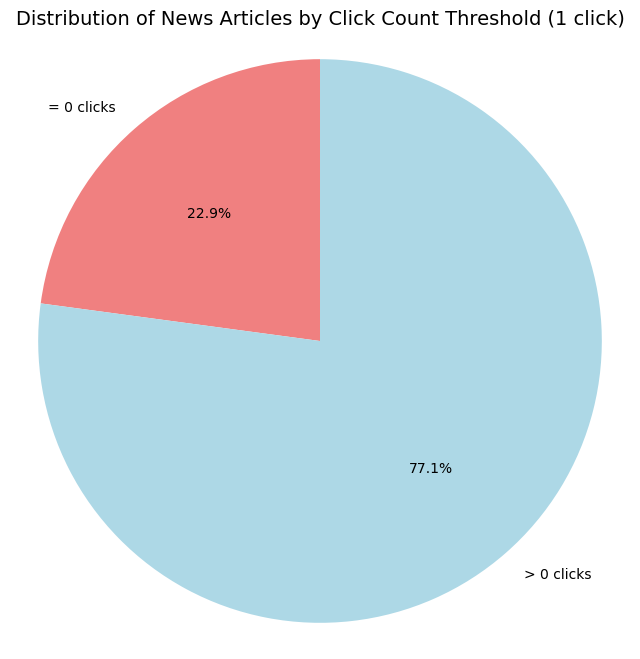


Percentage of news with = 0 click: 22.9%
Percentage of news with > 0 click: 77.1%


In [20]:
# check the new proportions
low_clicks = (balanced_news_data['Clicked_Count'] == 0).sum()
high_clicks = (balanced_news_data['Clicked_Count'] > 0).sum()

print(f"\nNews articles with = 0 clicks: {low_clicks}")
print(f"News articles with > 0 clicks: {high_clicks}")

# Create pie chart for click threshold distribution
plt.figure(figsize=(8, 8))
labels = ['= 0 clicks', '> 0 clicks']
sizes = [low_clicks, high_clicks]
colors = ['lightcoral', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of News Articles by Click Count Threshold (1 click)', fontsize=14)
plt.axis('equal')
plt.show()

# Additional insights
print(f"\nPercentage of news with = 0 click: {low_clicks/len(balanced_news_data)*100:.1f}%")
print(f"Percentage of news with > 0 click: {high_clicks/len(balanced_news_data)*100:.1f}%")

In [21]:
# 5. Clean behavior data - Remove deleted news IDs from impressions and interactions
print("\n=== CLEANING BEHAVIOR DATA ===")

# Get the set of news IDs that were kept in balanced dataset
kept_news_ids = set(balanced_news_data['News_ID'])
original_news_ids = set(news_data['News_ID'])
removed_news_ids = original_news_ids - kept_news_ids

print(f"News IDs kept: {len(kept_news_ids)}")
print(f"News IDs removed: {len(removed_news_ids)}")

# Function to clean impression strings
def clean_impressions(impressions_str, valid_news_ids):
    """Remove invalid news IDs from impression string"""
    if pd.isna(impressions_str) or impressions_str == '':
        return ''
    cleaned_impressions = []
    for imp in impressions_str.split():
        news_id, clicked = imp.split('-')
        if news_id in valid_news_ids:
            cleaned_impressions.append(imp)
    return ' '.join(cleaned_impressions)

# Robust function to clean news lists (handles list, np.ndarray, None, NaN, str)
def clean_news_list(news_list, valid_news_ids):
    """Remove invalid news IDs from news list (robust to type)"""
    import numpy as np
    try:
        if isinstance(news_list, np.ndarray):
            news_list = news_list.tolist()
        return [news_id for news_id in news_list if news_id in valid_news_ids]
    except Exception as e:
        return []

# Function to clean history strings
def clean_history(history_str, valid_news_ids):
    """Remove invalid news IDs from history string"""
    if pd.isna(history_str) or history_str == '':
        return ''
    cleaned_history = []
    for news_id in history_str.split():
        if news_id in valid_news_ids:
            cleaned_history.append(news_id)
    return ' '.join(cleaned_history)

# Clean the behavior data
print("Cleaning behavior data...")
behaviour_data_cleaned = behaviour_data.copy()

# Clean Impressions column
behaviour_data_cleaned['Impressions'] = behaviour_data_cleaned['Impressions'].apply(
    lambda x: clean_impressions(x, kept_news_ids)
)

# Clean History column
behaviour_data_cleaned['History'] = behaviour_data_cleaned['History'].apply(
    lambda x: clean_history(x, kept_news_ids)
)

# Clean Clicked_News and Non_Clicked_News columns
behaviour_data_cleaned['Clicked_News'] = behaviour_data_cleaned['Clicked_News'].apply(
    lambda x: clean_news_list(x, kept_news_ids)
)

behaviour_data_cleaned['Non_Clicked_News'] = behaviour_data_cleaned['Non_Clicked_News'].apply(
    lambda x: clean_news_list(x, kept_news_ids)
)

# Remove rows with empty impressions (no valid news articles left)
initial_rows = len(behaviour_data_cleaned)
behaviour_data_cleaned = behaviour_data_cleaned[behaviour_data_cleaned['Impressions'] != '']
final_rows = len(behaviour_data_cleaned)

print(f"Behavior data rows before cleaning: {initial_rows}")
print(f"Behavior data rows after cleaning: {final_rows}")
print(f"Rows removed (empty impressions): {initial_rows - final_rows}")

# Update the main datasets
news_data = balanced_news_data.copy()
behaviour_data = behaviour_data_cleaned.copy()

# to free up memory
del balanced_news_data
del behaviour_data_cleaned 
import gc
gc.collect()

print("\n=== FINAL DATASET SUMMARY ===")
print(f"Final news dataset size: {len(news_data)}")
print(f"Final behavior dataset size: {len(behaviour_data)}")
print(f"Click distribution: {(news_data['Clicked_Count'] > 0).sum()} clicked, {(news_data['Clicked_Count'] == 0).sum()} not clicked")

# Verify data integrity
print("\nData integrity check:")
all_impression_news = set()
for impressions in behaviour_data['Impressions']:
    if impressions:
        for imp in impressions.split():
            news_id = imp.split('-')[0]
            all_impression_news.add(news_id)

print(f"Unique news IDs in behavior data: {len(all_impression_news)}")
print(f"All behavior news IDs exist in news data: {all_impression_news.issubset(kept_news_ids)}")

# Update derived features that depend on news_data
print("\nUpdating derived features...")

# Recalculate click/ignore counts for the balanced dataset
from collections import Counter
import itertools

# Flatten all clicked and non-clicked news into single lists
all_clicked = list(itertools.chain.from_iterable(behaviour_data['Clicked_News'].dropna()))
all_ignored = list(itertools.chain.from_iterable(behaviour_data['Non_Clicked_News'].dropna()))

# Count occurrences using Counter
clicked_counter = Counter(all_clicked)
ignored_counter = Counter(all_ignored)

# Update counts in news_data
news_data['Clicked_Count'] = news_data['News_ID'].map(clicked_counter).fillna(0).astype(int)
news_data['Ignored_Count'] = news_data['News_ID'].map(ignored_counter).fillna(0).astype(int)
news_data['Total_Appearances'] = news_data['Clicked_Count'] + news_data['Ignored_Count']
news_data['Click_Rate'] = news_data['Clicked_Count'] / (news_data['Clicked_Count'] + news_data['Ignored_Count'] + 1e-8)

# Update category mapping
newsid_to_category = news_data.set_index('News_ID')['Category'].to_dict()
newsid_to_subcategory = news_data.set_index('News_ID')['SubCategory'].to_dict()

print("✓ Dataset balancing and cleaning completed successfully!")
print(f"✓ Ready for modeling with {len(news_data)} balanced news articles")



=== CLEANING BEHAVIOR DATA ===
News IDs kept: 10000
News IDs removed: 41282
Cleaning behavior data...
Behavior data rows before cleaning: 156965
Behavior data rows after cleaning: 156965
Rows removed (empty impressions): 0

=== FINAL DATASET SUMMARY ===
Final news dataset size: 10000
Final behavior dataset size: 156965
Click distribution: 7713 clicked, 2287 not clicked

Data integrity check:
Unique news IDs in behavior data: 8345
All behavior news IDs exist in news data: True

Updating derived features...
✓ Dataset balancing and cleaning completed successfully!
✓ Ready for modeling with 10000 balanced news articles


In [22]:
news_data.info(32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   News_ID            10000 non-null  object 
 1   Category           10000 non-null  object 
 2   SubCategory        10000 non-null  object 
 3   Title              10000 non-null  object 
 4   Abstract           10000 non-null  object 
 5   URL                10000 non-null  object 
 6   Title_Entities     10000 non-null  object 
 7   Abstract_Entities  10000 non-null  object 
 8   Clicked_Count      10000 non-null  int64  
 9   Ignored_Count      10000 non-null  int64  
 10  Total_Appearances  10000 non-null  int64  
 11  Click_Rate         10000 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB
